In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50

# Define paths to your dataset
dataset_path = 'D:/DATASET/CNN/ballooning/train'

# Define the subdirectories for each class
class_names = ['0', '1']

# Initialize lists to store images and labels
images = []
labels = []

In [2]:
# Loop through each class directory
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    
    # Loop through each image in the class directory
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        
        # Read and preprocess the image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image is None:
            print(f"Error: Unable to load image at path: {image_path}")
            continue  # Skip to the next image
        if image.size == 0:
            print(f"Error: Empty image at path: {image_path}")
            continue  # Skip to the next image
        image = cv2.resize(image, (224, 224))  # Resize to match ResNet50 input shape
        images.append(image)
        
        # Assign the label based on the class directory
        label = int(class_name)
        labels.append(label)

Error: Unable to load image at path: D:/DATASET/CNN/ballooning/train\0\Thumbs.db
Error: Unable to load image at path: D:/DATASET/CNN/ballooning/train\1\Thumbs.db


In [3]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

Images shape: (27698, 224, 224, 1)
Labels shape: (27698,)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [4]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255
)

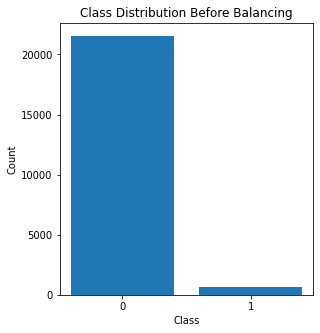

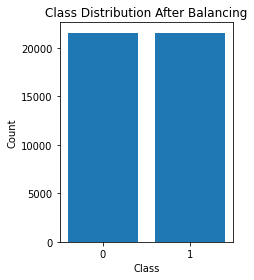

In [5]:
import matplotlib.pyplot as plt

# Visualize class distribution before balancing
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(np.unique(y_train), np.bincount(y_train))
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')

# Set the x-axis ticks to only show class labels 0 and 1
plt.xticks([0, 1])
plt.show()

# Implement data balancing technique (oversampling of minority class)
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_reshaped, y_train)

# Reshape X_train_balanced back to original shape
X_train_balanced = X_train_balanced.reshape(X_train_balanced.shape[0], 224, 224, 3)

# Create an instance of ImageDataGenerator for preprocessing images
image_data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255
)

# Define batch size
batch_size = 32

# Define the directories for training and validation data
validation_dir = 'D:/DATASET/CNN/ballooning/val'

# Prepare iterators for validation data
validation_iterator = image_data_generator.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# Define the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a flattening layer and a fully connected layer to the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data_generator.flow(X_train_balanced, y_train_balanced, batch_size=batch_size),
                    steps_per_epoch=len(X_train_balanced) // batch_size,
                    epochs=5,
                    validation_data=validation_iterator)





'''
# Reshape X_train and X_test to remove the channel dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_reshaped, y_train)

# Reshape X_train_balanced back to original shape
X_train_balanced = X_train_balanced.reshape(X_train_balanced.shape[0], X_train.shape[1], X_train.shape[2])

# Train your model using X_train_balanced and y_train_balanced
'''


# Visualize class distribution after balancing
plt.subplot(1, 2, 2)
plt.bar(np.unique(y_train_balanced), np.bincount(y_train_balanced))
plt.title('Class Distribution After Balancing')
plt.xlabel('Class')
plt.ylabel('Count')

# Set the x-axis ticks to only show class labels 0 and 1
plt.xticks([0, 1])

plt.tight_layout()
plt.show()

In [6]:
# Reshape X_test to remove the channel dimension
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create an instance of ImageDataGenerator for preprocessing images
image_data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255
)

# Define batch size
batch_size = 32

# Define the directories for training and validation data
train_dir = 'D:/DATASET/CNN/ballooning/train'
validation_dir = 'D:/DATASET/CNN/ballooning/val'

In [14]:
import cv2

# Resize images to a smaller size
resized_images = [cv2.resize(img, (100, 100)) for img in X_train_balanced]

# Convert the list of resized images to a numpy array
X_train_resized = np.array(resized_images)

print("Shape of X_train_resized:", X_train_resized.shape)

# Convert grayscale images to RGB format
X_train_rgb = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])

# Reshape X_train_rgb to include the channel dimension
X_train_rgb = X_train_rgb.reshape(-1, 100, 100, 3)

print("Shape of X_train_rgb:", X_train_rgb.shape)


# Create a custom data generator for training data using oversampled images
train_data_generator = image_data_generator.flow(
    X_train_rgb, y_train_balanced,
    batch_size=batch_size,
    shuffle=True  # Shuffle the data
)

Shape of X_train_resized: (43084, 100, 100)
Shape of X_train_rgb: (43084, 100, 100, 3)


In [20]:
# Prepare iterators for validation data
validation_iterator = image_data_generator.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 27698 images belonging to 2 classes.


In [21]:
# Define the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Add a flattening layer and a fully connected layer to the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [22]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data_generator, epochs=5, validation_data=validation_iterator)

Epoch 1/5
1347/1347 [==============================] - ETA: 0s - loss: 0.2407 - accuracy: 0.9282

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_2/Relu' defined at (most recent call last):
    File "C:\Users\JUHI\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\JUHI\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\JUHI\anaconda3\lib\site-packages\traitlets\config\application.py", line 1041, in launch_instance
      app.start()
    File "C:\Users\JUHI\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\JUHI\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\JUHI\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\JUHI\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\JUHI\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\Users\JUHI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\JUHI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\JUHI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-22-f7777c5eb01d>", line 5, in <module>
      history = model.fit(train_data_generator, epochs=5, validation_data=validation_iterator)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\training.py", line 1729, in fit
      val_logs = self.evaluate(
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\training.py", line 1788, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\JUHI\anaconda3\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_2/Relu'
Matrix size-incompatible: In[0]: [32,100352], In[1]: [32768,256]
	 [[{{node sequential_1/dense_2/Relu}}]] [Op:__inference_test_function_91115]

In [ ]:
from skimage import color

# Convert grayscale images to RGB format
X_test_rgb = np.array([color.gray2rgb(img) for img in X_test_reshaped])

# Reshape X_test_rgb to the original image shape
X_test_original_shape = X_test_rgb.reshape(-1, 224, 224, 3)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_original_shape, y_test)
print("Test Accuracy:", test_acc)

# Save the model
model.save('D:/DATASET/Models/model_ballooning.h5')

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()